In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
img = Image.open('iris.jpg')

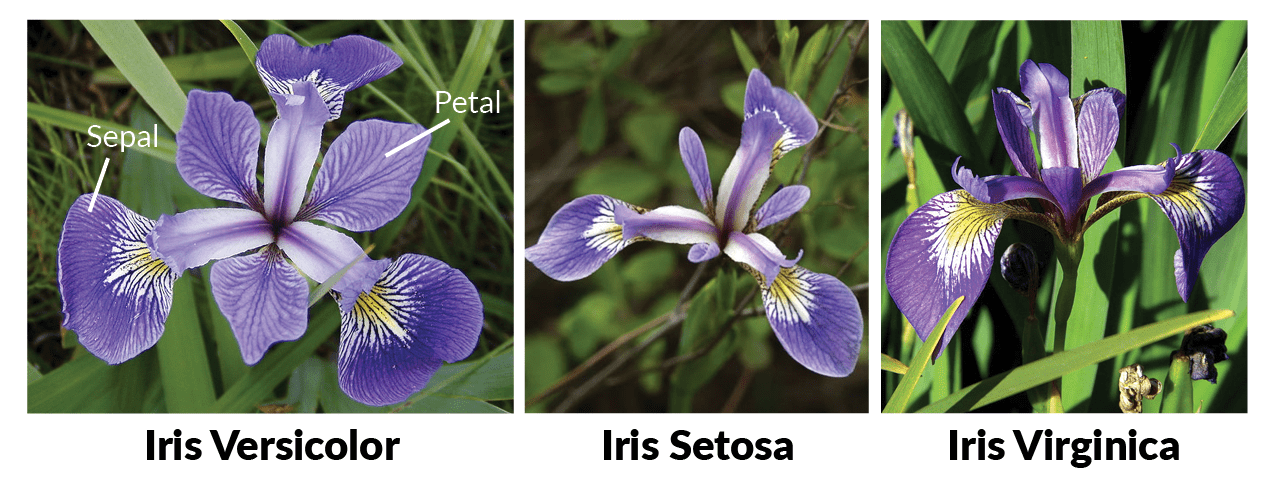

In [6]:
img

In [8]:
df = pd.read_csv('iris.csv')

In [10]:
df.drop('Id', axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

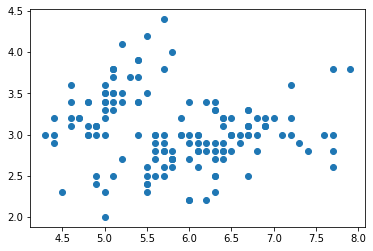

In [16]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])

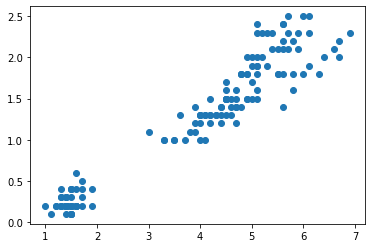

In [17]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])

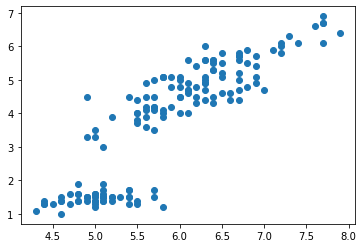

In [18]:
plt.scatter(df['SepalLengthCm'],df['PetalLengthCm'])

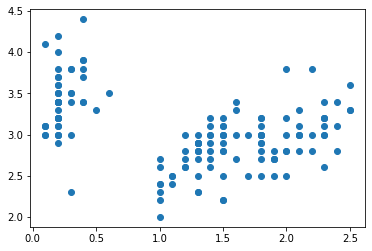

In [19]:
plt.scatter(df['PetalWidthCm'],df['SepalWidthCm'])

In [20]:
import seaborn as sns

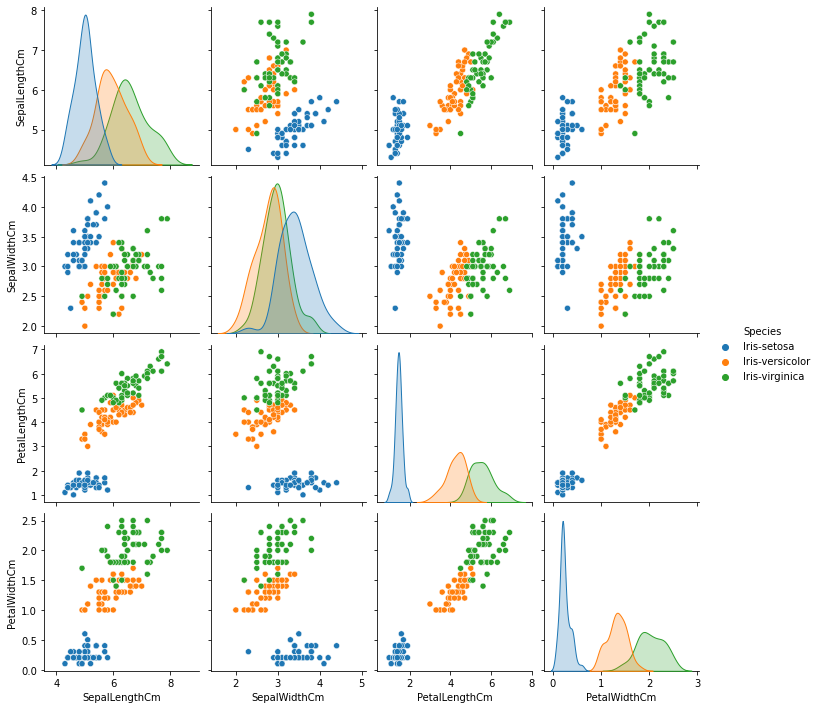

In [21]:
sns.pairplot(df, hue='Species')

In [22]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
df2 = df[(df['Species']=='Iris-setosa')|(df['Species']=='Iris-versicolor')]

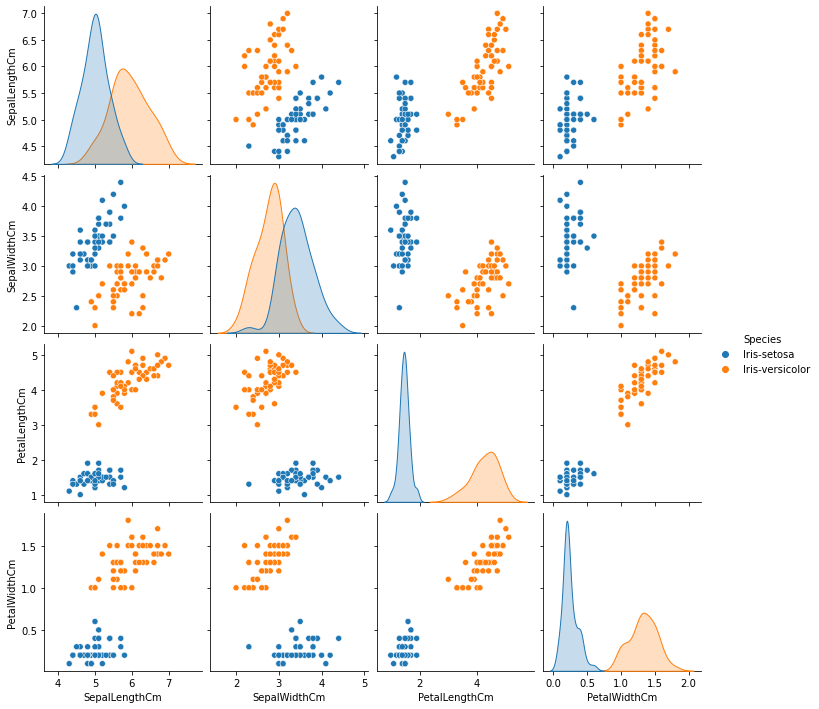

In [25]:
sns.pairplot(df2, hue='Species')

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(df2.drop('Species',axis=1), df2['Species'], test_size=0.25, random_state=101)

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  100 non-null    float64
 1   SepalWidthCm   100 non-null    float64
 2   PetalLengthCm  100 non-null    float64
 3   PetalWidthCm   100 non-null    float64
 4   Species        100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [30]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 13 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  75 non-null     float64
 1   SepalWidthCm   75 non-null     float64
 2   PetalLengthCm  75 non-null     float64
 3   PetalWidthCm   75 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


In [31]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 16 to 2
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  25 non-null     float64
 1   SepalWidthCm   25 non-null     float64
 2   PetalLengthCm  25 non-null     float64
 3   PetalWidthCm   25 non-null     float64
dtypes: float64(4)
memory usage: 1000.0 bytes


In [32]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [33]:
model = LogisticRegression().fit(xtrain,ytrain)

In [34]:
round(model.score(xtest,ytest)*100, 2)

100.0

In [36]:
df3 = df[(df['Species']=='Iris-versicolor')|(df['Species']=='Iris-virginica')]
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(df3.drop('Species',axis=1), df3['Species'], test_size=0.25, random_state=101)
model3 = LogisticRegression().fit(xtrain3,ytrain3)
round(model3.score(xtest3,ytest3)*100, 2)

100.0